# **Data Mining Project** 
# Task 1.2: Data Preparation
Pistolesi Veronica, Poli Francesca

### Libraries and drive mounting




In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import datetime
import sklearn

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load users_profile.csv

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             11508 non-null  int64  
 1   name                11507 non-null  object 
 2   lang                11508 non-null  object 
 3   bot                 11508 non-null  int64  
 4   user_created_at     11508 non-null  object 
 5   statuses_count      11508 non-null  int64  
 6   retweet_count       11508 non-null  float64
 7   reply_count         11508 non-null  float64
 8   favorite_count      11508 non-null  float64
 9   num_hashtags        11508 non-null  float64
 10  num_urls            11508 non-null  float64
 11  num_mentions        11508 non-null  float64
 12  max_retweet_count   11508 non-null  float64
 13  max_favorite_count  11508 non-null  float64
 14  std_retweet_count   11508 non-null  float64
 15  std_favorite_count  11508 non-null  float64
 16  acti

In [ ]:
users_profile.isnull().any()

user_id               False
name                   True
lang                  False
bot                   False
user_created_at       False
statuses_count        False
retweet_count         False
reply_count           False
favorite_count        False
num_hashtags          False
num_urls              False
num_mentions          False
max_retweet_count     False
max_favorite_count    False
std_retweet_count     False
std_favorite_count    False
activity              False
popularity            False
nightly               False
most_freq_year        False
most_freq_hour        False
tweet_richness        False
text_entropy          False
hour_entropy          False
favcount_entropy      False
retcount_entropy      False
repcount_entropy      False
has_entropy           False
url_entropy           False
men_entropy           False
avg_textlen           False
days_on_tw            False
activity_richness     False
dtype: bool

## Outliers Removal

We focused on the basic indicators because, despite the initial cutting of the most extreme outliers, they still reached the highest cardinality by being sums.

Using the Interquartile Range we checked if their values were higher than the third quartile ($75\%$) or lower than the first quartile ($25\%$), that we can consider as thresholds: if that's the case, the value is substituted with the closer quartile, in order to give upper and lower limit to our data.

In [ ]:
users_profile[['statuses_count','retweet_count','reply_count','favorite_count','num_hashtags','num_urls','num_mentions']].describe()

,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,11508.000000,1.150800e+04,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,5566.570473,5.028411e+05,166.536583,1276.701078,178.669013,182.651199,505.974105
std,17120.740691,2.978291e+06,1143.118244,20080.225205,496.481408,455.009101,1012.748948
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,3.000000e+00,0.000000,3.000000,5.000000,0.000000,2.000000
50%,68.000000,4.000000e+01,0.000000,10.000000,11.000000,2.000000,37.000000
75%,2520.250000,5.552725e+04,0.000000,414.250000,122.000000,98.000000,514.250000
max,200000.000000,9.936067e+07,20001.000000,822127.000000,16228.000000,4335.000000,13664.000000


In [ ]:
# outliers removal from numerical columns

def cap_data(df):

    for col in df.columns:

        if ( col=='statuses_count' or col=='retweet_count' or col=='reply_count' or col=='favorite_count' or col=='num_hashtags' or col=='num_urls' or col=='num_mentions' ):             
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # capping columns at those values
            df[col][df[col] < (Q1 - 1.5 * IQR)] = Q1 - 1.5 * IQR
            df[col][df[col] > (Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR

        else:

            df[col] = df[col]

    return df

In [ ]:
users_profile = cap_data(users_profile)

<ipython-input-8-ddc70b25118c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < (Q1 - 1.5 * IQR)] = Q1 - 1.5 * IQR
<ipython-input-8-ddc70b25118c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > (Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR
<ipython-input-8-ddc70b25118c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < (Q1 - 1.5 * IQR)] = Q1 - 1.5 * IQR
<ipython-input-8-ddc70b25118c>:15: Se

In [ ]:
users_profile[['statuses_count','retweet_count','reply_count','favorite_count','num_hashtags','num_urls','num_mentions']].describe()

,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,11508.000000,11508.000000,11508.0,11508.000000,11508.000000,11508.000000,11508.000000
mean,1581.249142,35377.413234,0.0,253.614127,77.345977,61.916232,315.922478
std,2484.544025,57043.878813,0.0,385.154016,108.554021,94.048794,493.116039
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,42.000000,3.000000,0.0,3.000000,5.000000,0.000000,2.000000
50%,68.000000,40.000000,0.0,10.000000,11.000000,2.000000,37.000000
75%,2520.250000,55527.250000,0.0,414.250000,122.000000,98.000000,514.250000
max,6237.625000,138813.625000,0.0,1031.125000,297.500000,245.000000,1282.625000


In [ ]:
users_profile.to_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', index=False)

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

## Correlations 

In [ ]:
users_profile_num = users_profile[['statuses_count', 'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions', 'max_retweet_count', 'max_favorite_count', 'std_retweet_count', 'std_favorite_count', 'activity', 'popularity', 'tweet_richness', 'text_entropy', 'hour_entropy', 'favcount_entropy', 'retcount_entropy', 'repcount_entropy', 'has_entropy', 'url_entropy', 'men_entropy', 'avg_textlen', 'days_on_tw', 'activity_richness']]

In [ ]:
users_profile_num.describe()

,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
count,11508.000000,11508.000000,11508.0,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,...,11508.000000,11508.000000,11508.000000,11508.0,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,1581.249142,35377.413234,0.0,253.614127,77.345977,61.916232,315.922478,36891.856882,217.869743,1710.423188,...,0.061844,1.906487,1.066179,0.0,1.986260,2.034642,2.565031,70.299716,1820.613399,0.509723
std,2484.544025,57043.878813,0.0,385.154016,108.554021,94.048794,493.116039,98009.687310,1234.961104,5439.128479,...,0.340502,3.096155,1.707308,0.0,3.193921,3.248886,3.674023,16.597382,552.448001,0.699536
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,890.000000,0.000319
25%,42.000000,3.000000,0.0,3.000000,5.000000,0.000000,2.000000,1.000000,1.000000,0.153650,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,61.367982,1311.000000,0.034878
50%,68.000000,40.000000,0.0,10.000000,11.000000,2.000000,37.000000,7.000000,2.000000,0.656625,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,67.598590,1702.000000,0.103817
75%,2520.250000,55527.250000,0.0,414.250000,122.000000,98.000000,514.250000,11447.250000,12.000000,957.771862,...,0.000000,2.522878,1.694437,0.0,2.947703,2.807355,4.037033,79.771721,2079.000000,0.801398
max,6237.625000,138813.625000,0.0,1031.125000,297.500000,245.000000,1282.625000,500000.000000,10000.000000,106034.982635,...,3.526946,9.690630,6.369161,0.0,9.898855,10.002679,11.173624,245.000000,3900.000000,4.148438


In [ ]:
plt.figure(figsize = (15,6), dpi=500)
sns.heatmap(users_profile_num.corr(), annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## High correlations check

We now focus on those correlations higher than 0.8% that are considered conventionally too high to be informative and put the output in a new dataset.

In [ ]:
for i in range(0, len(users_profile_num.columns)):
    for j in range(i+1, len(users_profile_num.columns)):
        corr = users_profile_num[users_profile_num.columns[i]].corr(users_profile_num[users_profile_num.columns[j]])
        if  corr > 0.8:
            print(users_profile_num.columns[i] + " - " + users_profile_num.columns[j] + "\t" + '{:.2f}'.format(corr))

statuses_count - num_mentions	0.80
statuses_count - activity	0.88
retweet_count - num_mentions	0.84
num_urls - activity	0.81
activity - activity_richness	0.93
text_entropy - favcount_entropy	0.98
text_entropy - retcount_entropy	0.92
text_entropy - has_entropy	0.98
text_entropy - url_entropy	0.98
text_entropy - men_entropy	1.00
favcount_entropy - retcount_entropy	0.91
favcount_entropy - has_entropy	0.99
favcount_entropy - url_entropy	0.99
favcount_entropy - men_entropy	0.98
retcount_entropy - has_entropy	0.91
retcount_entropy - url_entropy	0.93
retcount_entropy - men_entropy	0.93
has_entropy - url_entropy	0.99
has_entropy - men_entropy	0.98
url_entropy - men_entropy	0.99


In [ ]:
users_profile_num = users_profile[['statuses_count', 'retweet_count', 'favorite_count', 'num_hashtags', 'num_urls', 'max_retweet_count', 'max_favorite_count', 'std_retweet_count', 'std_favorite_count', 'popularity', 'tweet_richness', 'retcount_entropy', 'avg_textlen', 'days_on_tw', 'activity_richness']]

removed attributes:

*   reply_count --> 0
*   repcount_entropy --> 0
*   hour_entropy --> 0
*   activity
*   num_mentions
*   text_entropy
*   favcount_entropy
*   has_entropy	
*   url_entropy	
*   men_entropy	




In [ ]:
for i in range(0, len(users_profile_num.columns)):
    for j in range(i+1, len(users_profile_num.columns)):
        corr = users_profile_num[users_profile_num.columns[i]].corr(users_profile_num[users_profile_num.columns[j]])
        if  corr > 0.8:
            print(users_profile_num.columns[i] + " - " + users_profile_num.columns[j] + "\t" + '{:.2f}'.format(corr))

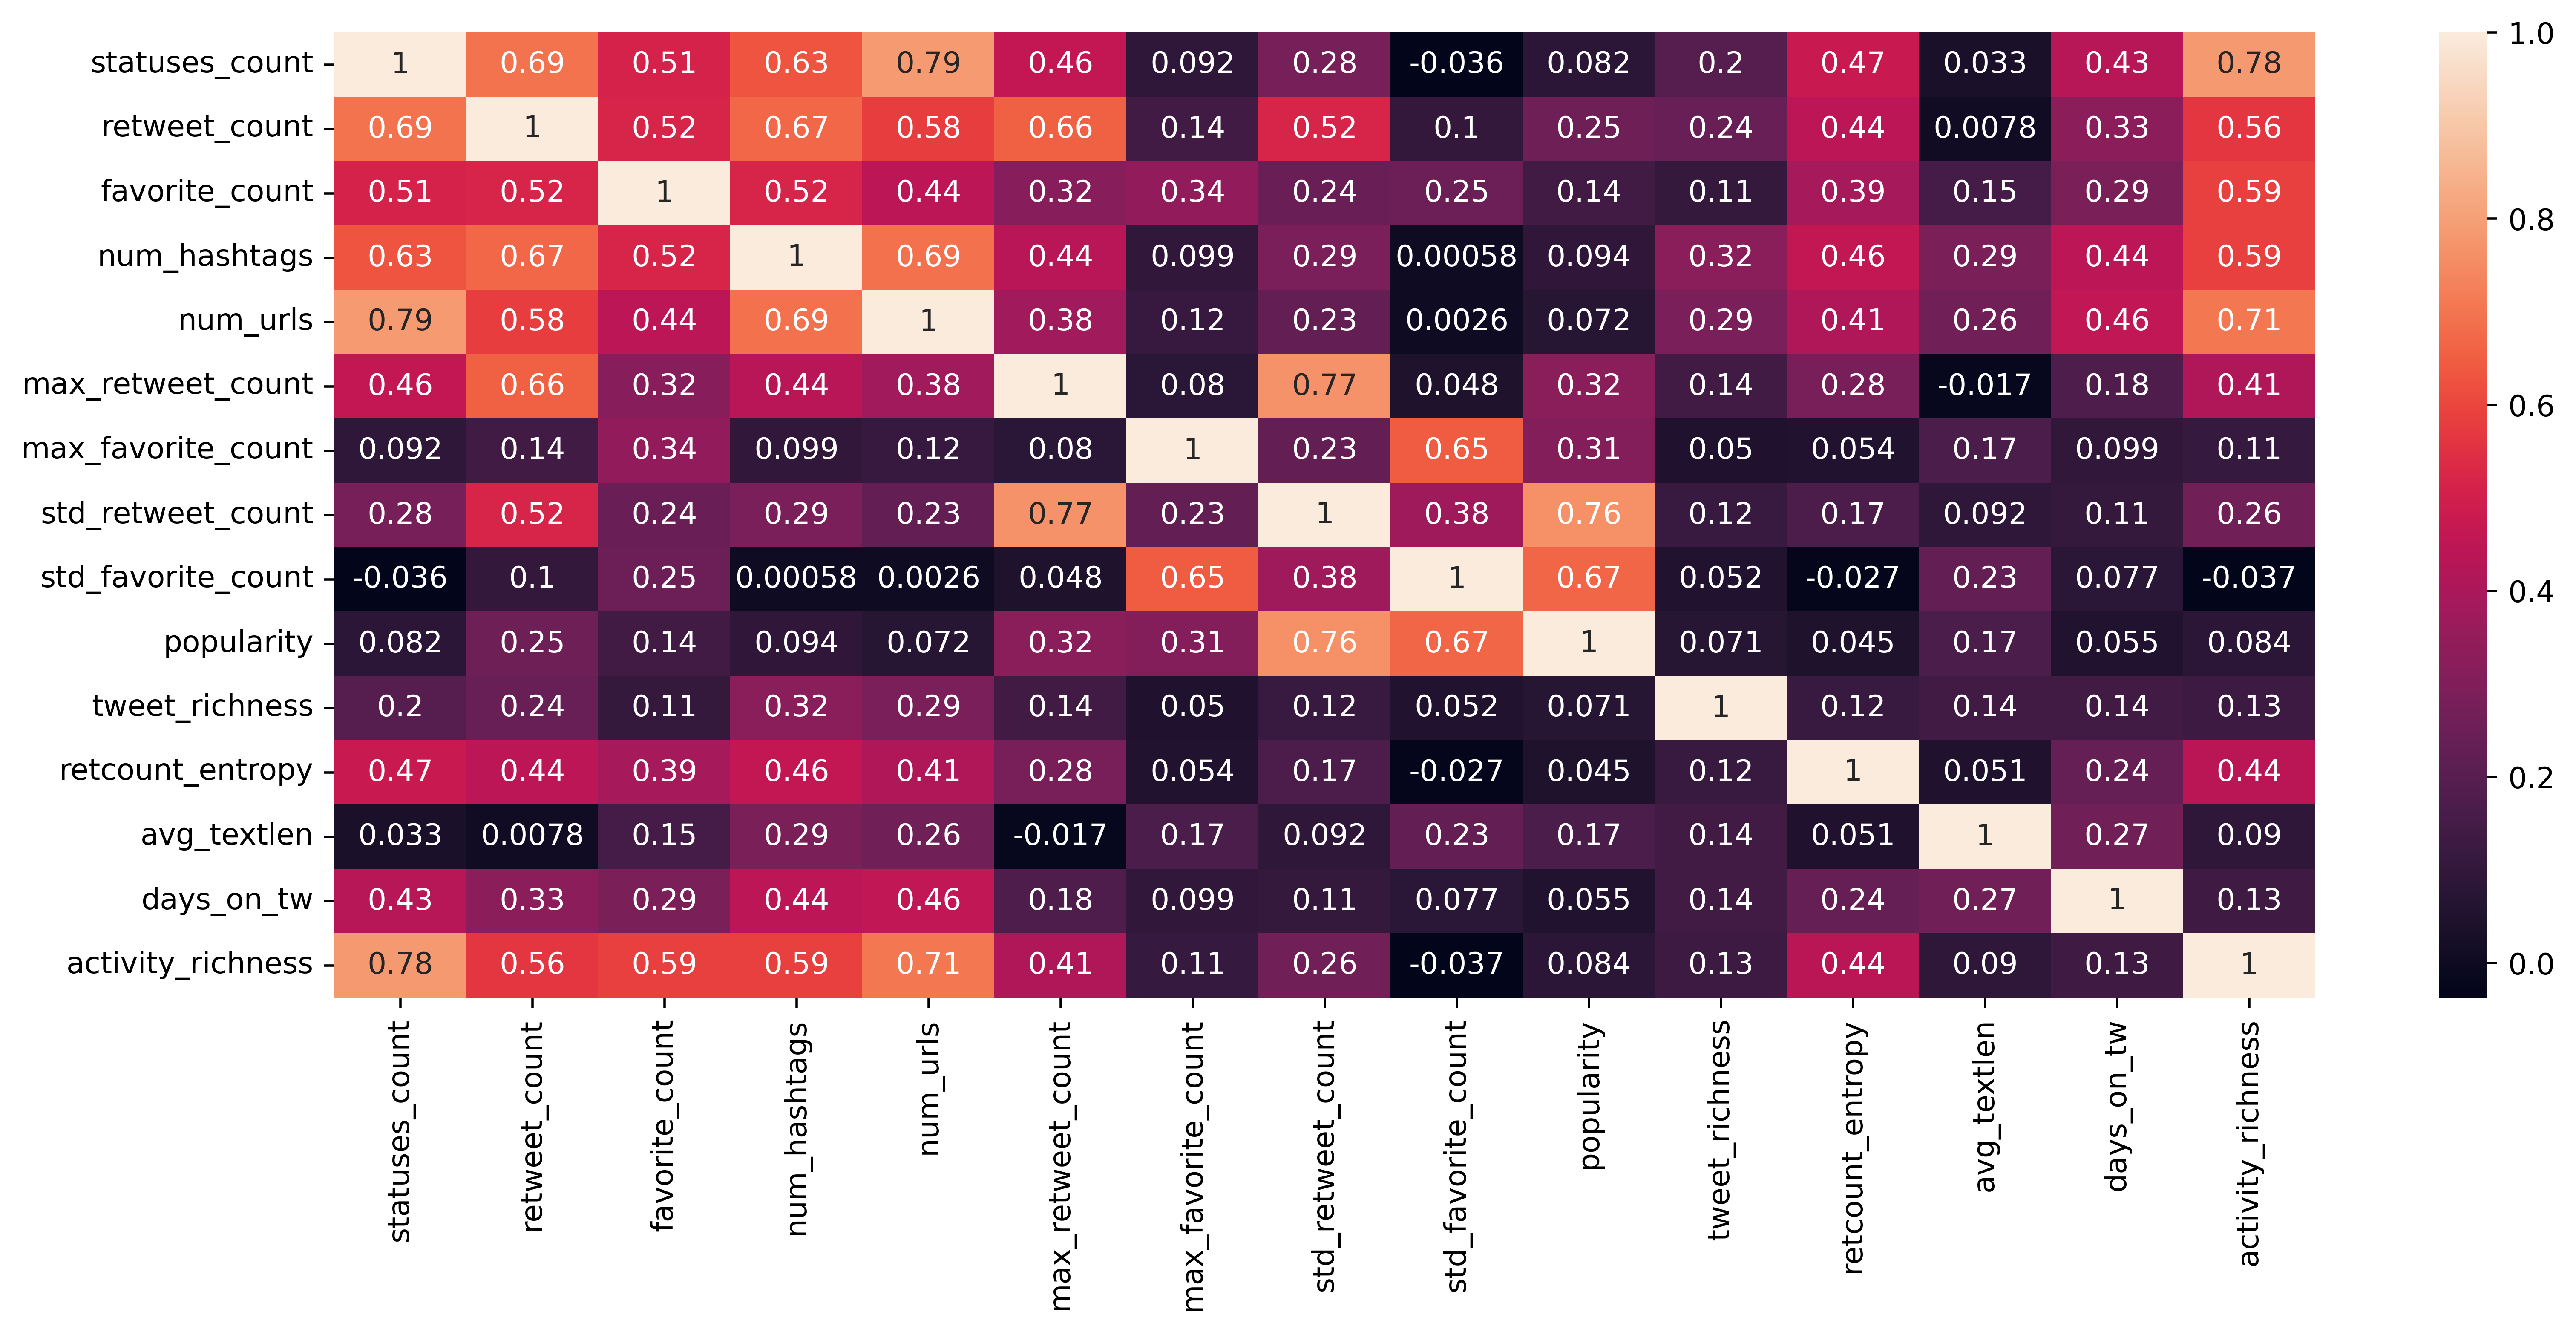

In [ ]:
plt.figure(figsize = (15,6),dpi=500)
sns.heatmap(users_profile_num.corr(), annot=True)
plt.show()

In [ ]:
users_profile_num.to_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering_noout.csv', index=False)

<Figure size 7500x7500 with 0 Axes>

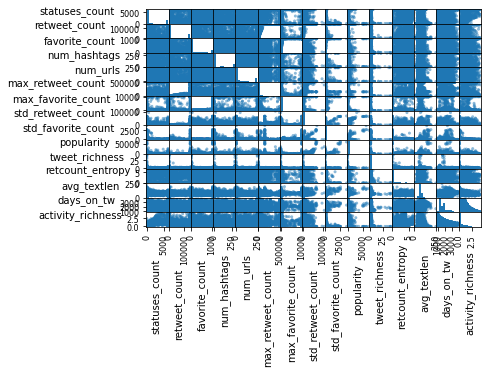

In [ ]:
plt.figure(figsize=(15, 15), dpi=500)
axes = pd.plotting.scatter_matrix(users_profile_num)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()